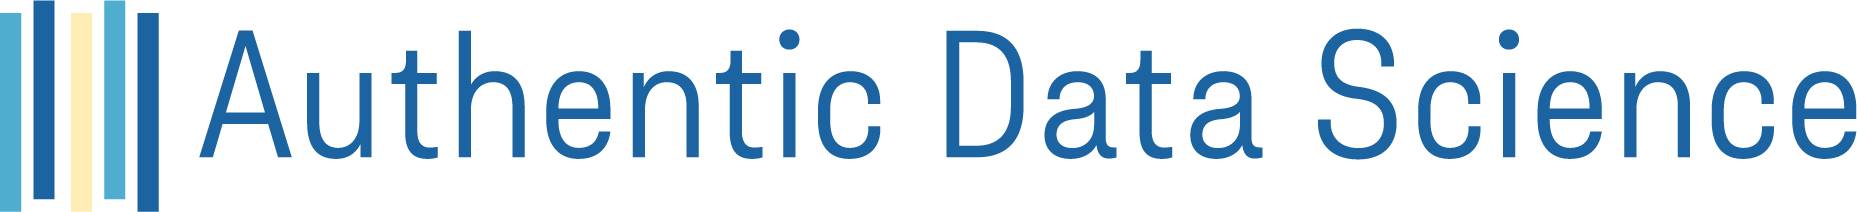

All rights to this material and its parts reserved by the authors:

- Róbert Barcík (robert@authenticdatascience.com)
- Patrik Žatko (patrik@authenticdatascience.com)
- Jana Gecelovská (janka@authenticdatascience.com)

Licenses and citations are at the bottom of the notebook.

# About

You will learn in this notebook how to use the pretrained vectors from the fasttext and use it directly for your use case.

# Imports

This notebook was developed under Python 3.9.15.

## Install fasttext

The first option is conda installation, the second is pip and the third is a local installation of the package downloaded from [github](https://github.com/facebookresearch/fastText.git) with ```!git clone https://github.com/facebookresearch/fastText.git.```

In [1]:
## uncomment this cell to install fasttext with conda
# ! conda install -c esri fasttext==0.9.2 -y

In [2]:
## uncomment this cell to install fasttext with pip
# pip install fasttext==0.9.2

In [3]:
## if the above does not work uncomment this cell
# import os 
# os.chdir('packages/fastText')
# ! python setup.py install
# os.chdir("../..")

## Other packages

In [91]:
# ! conda install -c conda-forge scikit-learn==1.1.3 -y
# ! conda install -c conda-forge pandas==1.4.4 -y
# ! conda install -c conda-forge matplotlib==3.6.2 -y
# ! conda install -c conda-forge numpy==1.23.4 -y

In [ ]:
# ! pip install scikit-learn==1.1.3 
# ! pip install pandas==1.4.4
# ! pip install matplotlib==3.6.2
# ! pip install numpy==1.23.4

In [72]:
import fasttext
import fasttext.util
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import io

# Word Vectors for 157 Languages

The Word Vectors for 157 languages in this section were downloaded from this [page](https://fasttext.cc/docs/en/crawl-vectors.html). They were trained on Common Crawl and Wikipedia. The models were trained using Continuous Bag of Words and the output in the files that can be downloaded are 300 dimensional vectors. No changes were made.

- license: They come under the [Attribution-ShareAlike 3.0 Unported (CC BY-SA 3.0) license](https://creativecommons.org/licenses/by-sa/3.0/) and therefore this notebook is also distributed under the same license. 
- citation: E. Grave*, P. Bojanowski*, P. Gupta, A. Joulin, T. Mikolov, [Learning Word Vectors for 157 Languages](https://arxiv.org/abs/1802.06893)

There are 2 types of files that we can download - .bin and .vec files. The .vec files are simple mappings between the words and their embeddings in a human readable form. Files ending with .bin contain additionally the model. The .bin files can be easily downloaded with fasttext.util.download_model() function where we specify the language of the model we want to download. Then we just load the model as we did before. The .vec files we would have to download manually and read the file as a text file. 

We can download and load the models that were trained to create word vectors with python as in the first cell below (this takes long) or download them manually and load from local files as in the second cell below (takes ca. 1 min). The files are quite large. For example the english pretrained model has ca 7GB. The download with a Python function takes around 30 minutes.

In [4]:
# %%time
# # this cell takes long as it downloads the file and then loads it
# # use the cell below this one

# # download the word vectors from the internet 
# fasttext.util.download_model('en', if_exists='ignore')  
# pretrained_model = fasttext.load_model('cc.en.300.bin')

In [5]:
%%time
# load the word vectors from downloaded file. This takes ca. 2 mins
pretrained_model = fasttext.load_model('pretrained/cc.en.300.bin')

CPU times: user 7.01 s, sys: 25.2 s, total: 32.2 s
Wall time: 2min 39s


We can use the pretrained model to get the embeddings for the words.

In [6]:
# return the embedding for words data science
print(f'Shape of the embedding: {pretrained_model["science"].shape}')

# we can either directly subset the pretrained_model as above or use 
# get_word_vector() function
pretrained_model.get_word_vector('science')

Shape of the embedding: (300,)


array([-7.94085786e-02,  2.87245438e-02, -1.68658420e-02,  1.19844954e-02,
        3.15471813e-02, -1.45631135e-01,  1.32278770e-01, -2.51087509e-02,
       -8.69869143e-02, -3.73702943e-02,  3.79519761e-02,  4.54576686e-03,
       -2.63195783e-02,  3.30929235e-02,  1.41380168e-02, -5.89229427e-02,
        2.71881260e-02, -8.81989747e-02,  1.51194092e-02,  3.79121602e-02,
        2.64011621e-02,  3.40236798e-02, -2.36808918e-02,  1.34074599e-01,
       -1.12751052e-02,  1.49286967e-02, -3.85434031e-02, -2.91209444e-02,
        2.88348254e-02,  7.80087113e-02, -5.29720411e-02, -2.60807201e-03,
       -4.22817394e-02, -3.09362542e-02,  2.60530338e-02, -2.83413213e-02,
        4.01732139e-03,  4.86927747e-04,  2.23136228e-02,  7.18428520e-03,
        5.26132062e-04, -6.69688731e-02, -2.23910548e-02,  6.11064676e-03,
       -9.99280363e-02, -5.96311204e-02, -3.47281545e-02,  5.48421070e-02,
       -3.30480188e-02, -5.38034253e-02, -5.37822302e-03,  6.56269789e-02,
        1.31316585e-02,  

In [20]:
# we can get the nearest neighbors of the word
pretrained_model.get_nearest_neighbors('science', 100)

[(0.7547857761383057, 'sciene'),
 (0.734455943107605, 'sceince'),
 (0.7104663252830505, 'sciences'),
 (0.706987202167511, 'science.The'),
 (0.70185786485672, 'science.But'),
 (0.6845683455467224, 'science.This'),
 (0.6704586744308472, 'science.In'),
 (0.6678438782691956, 'science.'),
 (0.6667861342430115, 'science.It'),
 (0.6651142835617065, 'scientific'),
 (0.6642468571662903, 'science.As'),
 (0.6630662083625793, 'biology'),
 (0.6608973145484924, 'non-science'),
 (0.6558355093002319, 'science--and'),
 (0.6519156694412231, 'science.What'),
 (0.648481011390686, 'science-'),
 (0.6468634009361267, 'pre-science'),
 (0.6465475559234619, 'science.I'),
 (0.6449181437492371, 'science.So'),
 (0.6440593600273132, 'Science'),
 (0.6432005763053894, 'science.And'),
 (0.6369109153747559, 'science.If'),
 (0.6300424933433533, 'sicence'),
 (0.629770040512085, 'science.There'),
 (0.6253564357757568, 'scinece'),
 (0.624829888343811, 'nonscience'),
 (0.6245760321617126, 'physics'),
 (0.6243587136268616, '

Above, we returned 100 the most similar words to a word science based on a cosine similarity. The first value in the row is a cosine similarity and the second one is the string of the word.

## Word Analogies

Based on the word embeddings some analogies can be calculated. We can use the function get_analogies() to calculate related words. The function takes 3 words A, B and C. The resulting words D is calculated as D = A - B + C.

In [33]:
# king is to man as what is to woman?
pretrained_model.get_analogies("king", "man", "woman")

[(0.7554811835289001, 'queen'),
 (0.6141632199287415, 'queen-mother'),
 (0.5755330920219421, 'princess'),
 (0.5741076469421387, 'monarch'),
 (0.5688967704772949, 'kings'),
 (0.5649929046630859, 'queenship'),
 (0.5638618469238281, 'Queen'),
 (0.5544734597206116, 'empress'),
 (0.5524800419807434, 'consort'),
 (0.5497491955757141, 'queen.The')]

In [36]:
# Berlin minus Germany plus France is...
pretrained_model.get_analogies("Berlin", "Germany", "France")

[(0.8076005578041077, 'Paris'),
 (0.6606220006942749, 'Marseille'),
 (0.6587416529655457, 'Toulouse'),
 (0.6492162346839905, 'Marseilles'),
 (0.640845000743866, 'Paris.It'),
 (0.6382213234901428, 'Aix-en-Provence'),
 (0.629856526851654, 'Paris-'),
 (0.6222919225692749, 'Paris.In'),
 (0.6221699118614197, 'Brussels'),
 (0.6157652139663696, 'Grenoble')]

In [38]:
# doctor minus he plus she is...
pretrained_model.get_analogies("doctor", "he", "she")

[(0.6245920658111572, 'nurse'),
 (0.5953785181045532, 'gynecologist'),
 (0.59406578540802, 'midwife'),
 (0.5728363394737244, 'gynocologist'),
 (0.5705628395080566, 'doctors'),
 (0.5651015639305115, 'physician'),
 (0.5617859363555908, 'gynaecologist'),
 (0.5611947178840637, 'OBGYN'),
 (0.5518168807029724, 'nurse-practitioner'),
 (0.5515652894973755, 'pediatrician')]

You can see that when we take a doctor deducted the male pronoun he and add the female pronoun she the model returns word nurse. The embeddings learned some biases that it found in the data it was trained on. This should be kept in mind when building a model. There are some methods that debias the embeddings but this is out of scope of this notebook.

## Dimensionality Reduction of the Embeddings

In this section, we will select 6 words and for each we will calculate 100 the most similar words. We will visualize the word vectors by reducing the dimensions of the embeddings from 300 to 2. This will allow us to see relationships between the embeddings.

In [39]:
# get the n most similar words to words defined in the list 'words'

# define the number of the most similar words that we will search for
n = 100
# define the list of the words for which we will search for similar words
words = ['computer', 'law', 'swim', 'run', 'football', 'hockey']

# search for the most similar words based on the pretrained_model
words_all = [pretrained_model.get_nearest_neighbors(word, n) for word in words]
words_all

[[(0.7748078107833862, 'computers'),
  (0.7278218865394592, 'comptuer'),
  (0.7249574661254883, 'compuer'),
  (0.6960818767547607, 'comupter'),
  (0.691444456577301, 'comuter'),
  (0.6854090094566345, 'non-computer'),
  (0.6702727675437927, 'computer.But'),
  (0.6590123176574707, 'laptop'),
  (0.658584475517273, 'puter'),
  (0.65807044506073, 'computor'),
  (0.6496291756629944, 'mputer'),
  (0.6368193030357361, 'Computer'),
  (0.6248770356178284, 'conputer'),
  (0.6247384548187256, 'omputer'),
  (0.6243334412574768, 'computer.So'),
  (0.6235226392745972, 'computer.The'),
  (0.6231181025505066, 'lap-top'),
  (0.6208286881446838, 'computer.And'),
  (0.6207890510559082, 'computer.A'),
  (0.6196523904800415, 'comput'),
  (0.6096971035003662, 'computer.I'),
  (0.6079972982406616, 'computer-'),
  (0.6073806285858154, 'computer.When'),
  (0.6045119166374207, 'computer.As'),
  (0.60313880443573, 'cumputer'),
  (0.6023544669151306, 'acomputer'),
  (0.6005424857139587, 'workstation'),
  (0.59726

Below, we join all the information into one dataframe.

In [40]:
# concatenate together all the words, similarities and the words for which
# we were finding the similarities(key_word). The category is just an integer 
# refering to the key_word that will be used to distinguish embeddings based
# on a key_word with a color in the plot

words_all_flat = [word for words in words_all for word in words]
words_all_sim = pd.DataFrame(words_all_flat, 
                             columns = ['cosine_similarity', 'strings'])
words_all_sim.reset_index(inplace=True, drop=True)
words_all_sim['category'] = words_all_sim.index // n
words_all_sim['key_word'] = [words[i] for i in words_all_sim['category']]
words_all_sim

,cosine_similarity,strings,category,key_word
0,0.774808,computers,0,computer
1,0.727822,comptuer,0,computer
2,0.724957,compuer,0,computer
3,0.696082,comupter,0,computer
4,0.691444,comuter,0,computer
...,...,...,...,...
595,0.506587,non-NHL,5,hockey
596,0.505418,air-hockey,5,hockey
597,0.504827,skater,5,hockey
598,0.504114,Avs,5,hockey


We have all the most similar words for the 6 categories in one dataframe. Let's map the words to embeddings.

In [41]:
# get the embeddings for the similar words and concatenate to the dataframe
words_all_embs = pd.DataFrame(words_all_sim['strings']\
                              .apply(pretrained_model.get_word_vector)\
                              .tolist())
words_all_df = pd.concat([words_all_sim, words_all_embs], axis=1)
words_all_df

,cosine_similarity,strings,category,key_word,0,1,2,3,4,5,...,290,291,292,293,294,295,296,297,298,299
0,0.774808,computers,0,computer,-0.004453,0.019995,-0.017343,0.012087,-0.003914,0.014623,...,-0.046375,-0.007278,-0.061857,-0.009935,0.026169,0.012229,-0.009253,0.028182,0.008549,-0.021856
1,0.727822,comptuer,0,computer,-0.016364,0.039508,0.030479,0.051622,-0.022103,0.008772,...,-0.018372,-0.002408,-0.025274,0.024743,-0.061118,0.015779,-0.000781,0.049983,-0.037825,-0.099894
2,0.724957,compuer,0,computer,-0.006233,0.017177,-0.030331,0.042336,-0.059628,-0.007183,...,-0.018989,-0.012478,-0.053488,0.040191,-0.006552,0.038411,-0.012973,0.080028,-0.013287,-0.069250
3,0.696082,comupter,0,computer,-0.037865,-0.017408,0.048768,-0.008972,-0.001761,0.026913,...,-0.007162,0.004798,-0.052795,0.007521,-0.018313,0.026663,0.015152,0.084066,0.004352,-0.039269
4,0.691444,comuter,0,computer,0.016811,0.028769,0.013798,0.041655,-0.054345,0.021577,...,-0.056185,0.000824,-0.062739,-0.004575,0.028458,0.015266,0.051118,0.078134,-0.021987,-0.064277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.506587,non-NHL,5,hockey,0.039702,-0.035091,-0.056929,0.057426,-0.050613,0.063622,...,-0.054397,-0.011392,0.003304,-0.026770,0.017281,0.038837,0.142348,0.111240,-0.055843,-0.104853
596,0.505418,air-hockey,5,hockey,0.038432,-0.003776,-0.043907,0.038664,0.012710,0.017915,...,0.004763,-0.020577,-0.019840,-0.019439,0.041570,0.023352,-0.026576,0.091556,0.010785,-0.116131
597,0.504827,skater,5,hockey,0.095160,-0.064406,-0.087597,0.068343,-0.063210,-0.191711,...,-0.078259,0.043982,-0.010140,-0.036102,-0.069404,0.074237,0.220724,0.140826,0.058140,-0.109009
598,0.504114,Avs,5,hockey,-0.003418,-0.137598,0.049530,0.000903,-0.554573,-0.072319,...,-0.013890,0.033783,0.063623,-0.039665,0.113299,0.111837,0.563618,0.218876,-0.092621,-0.084498


/HDD_1TB/programs/anaconda3/envs/lvl4nlp/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/HDD_1TB/programs/anaconda3/envs/lvl4nlp/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


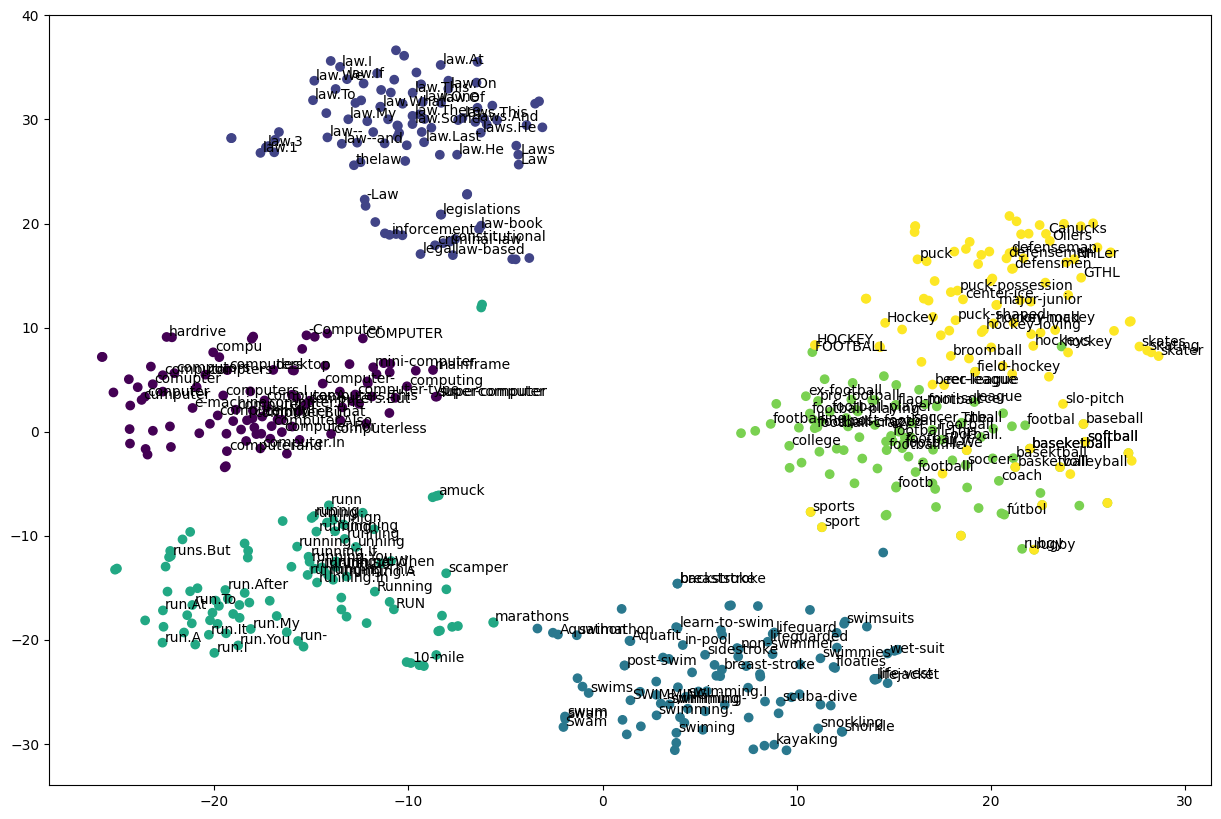

In [46]:
# fit the t-sne to reduce the dimensionality of the embeddings 
tsne = TSNE(2, random_state=1)
words_all_2d = pd.DataFrame(tsne.fit_transform(words_all_embs))

# visualize the embeddings in 2D
plt.figure(figsize=(15, 10))
plt.scatter(words_all_2d.loc[:, 0], 
            words_all_2d.loc[:, 1],
            c=words_all_df['category']
            )
# show a text for the every 3rd word
for idx, row in words_all_df.iterrows():
    if idx % 3==0:
        plt.text(words_all_2d.loc[idx, 0]+0.1, 
                 words_all_2d.loc[idx, 1]+0.1,
                 words_all_df.loc[idx, 'strings']);

We can see that the sport related words are closer to each other in the plot than computer and law related words. From the sports, the running related words are closer to swimming related words. Likewise, hockey related words are closer to football related words. Maybe because running and swimming are individual sports and occur usually in a different context than team sports like football or hockey.

## Sentence Embeddings

### Data

We will use the same dataset as in the previous notebook with newspaper texts and subset 3 categories of the text.

You have 2 options here. Either uncomment the 1st cell and download the data with scikit-learn or uncomment the second cell and load the data from the local folder named data. If you are working in a Google Colab then create a 'data' folder in your working directory and upload the 4 files with the data there.

In [47]:
categories = ['talk.politics.mideast', 'sci.crypt', 'rec.motorcycles']

In [48]:
## 1st option: load data with scikit-learn

# x_train, y_train = fetch_20newsgroups(subset='train', 
#                                       categories=categories,
#                                       remove=('headers', 'footers', 'quotes'),
#                                       return_X_y=True,
#                                       random_state=42)

# x_test, y_test = fetch_20newsgroups(subset='test', 
#                                     categories=categories,
#                                     remove=('headers', 'footers', 'quotes'),
#                                     return_X_y=True,
#                                     random_state=42)

In [51]:
## 2nd option: load data from the local folder named 'data'
with open('data/x_train_20news.pkl', 'rb') as handle:
    x_train = pickle.load(handle)
    
with open('data/x_test_20news.pkl', 'rb') as handle:
    x_test = pickle.load(handle)
    
with open('data/y_train_20news.pkl', 'rb') as handle:
    y_train = pickle.load(handle)

with open('data/y_test_20news.pkl', 'rb') as handle:
    y_test = pickle.load(handle)

In [52]:
# split test to validation and test
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, 
                                                test_size=0.5, 
                                                random_state=42,
                                                stratify=y_test)
print(f'There are {len(np.unique(y_train))} categories')

print(f'observations in train set: {len(y_train)}')
print(f'observations in train set: {len(y_val)}')
print(f'observations in test set: {len(y_test)}')

# example of the text: 
print('\nTEXT EXAMPLE:')
print(x_train[2])


There are 3 categories
observations in train set: 1757
observations in train set: 585
observations in test set: 585

TEXT EXAMPLE:

Let me see if I have this straight --- if a person knows S1 and S2,
and the serial number of the unit, it's easy to reconstruct UK.
Of course, if they know SK, the "family key", they can easily get the
serial number of any unit that has made a transmission.  So with S1 and
S2 being used for a while "batch" of the unit keys, the number of
used S1/S2 pairs will probably be fairly low.  Of course, you have to
believe that the NSA/FBI/name-your-favorite-government agency will
know SK so all it needs is the S1/S2 pairs, and presto, nasty details 
like court orders for wire taps are no longer necessary.

Now, I'm not one of the people who distrusts the government at every
turn, but taking someone's word for it that the S1/S2 pairs are not kept
around is pushing what I'm willing to believe just a little bit too far.




We can get embeddings for the whole documents with the pretrained model.

In [73]:
doc = 'This is my test sentence. Here, I write the second one.'
pretrained_model.get_sentence_vector(doc)

array([-2.09397692e-02,  1.33130923e-02, -1.49285160e-02,  5.26824594e-02,
        1.63380951e-02, -3.22267525e-02, -7.08562555e-03,  2.38912515e-02,
       -2.18609348e-02, -2.54344312e-03, -1.21964216e-02, -1.69910360e-02,
        1.70502730e-03,  1.72281563e-02, -1.56423990e-02,  6.27293736e-02,
        3.39203067e-02, -8.46614968e-03, -1.68934781e-02, -2.79003941e-03,
       -7.12747220e-03, -8.24084599e-03, -5.74983656e-03, -5.20894453e-02,
        1.02962609e-02, -1.85003411e-02, -5.30981412e-03,  2.37432774e-02,
       -2.07020491e-02,  7.23721087e-02, -9.31840483e-03, -1.47917438e-02,
        1.02818357e-02, -6.83228672e-02,  9.27058049e-04, -1.05452714e-02,
       -9.08206869e-03,  5.41035598e-03,  7.41758151e-03, -2.75621191e-03,
        1.36315078e-02, -9.50295478e-04, -9.47633944e-03,  3.32641751e-02,
        3.78231332e-03,  5.98515123e-02, -3.32777984e-02,  1.59556549e-02,
       -3.80596034e-02,  4.46744123e-03,  5.62045397e-03,  1.31473318e-02,
       -2.70867348e-03, -

In [82]:
# TASK 1: Use the pretrained model to classify the text
#     >>> remove the new line character from each row of the x_train '\n'
#         and save the cleaned text as a list to the variable x_train_clean
#     >>> apply the same on validation and test set and save to variables
#         x_val_clean and x_test_clean
#     >>> map each document to the sentence embedding and save the embeddings
#         to the list x_train_embs. 
#         Repeat the same for validation and test sets.
#     >>> convert x_train_embs to pandas dataframe and save under x_train_df.
#         Repeat the same for validation and test sets.

# remove new line characters
x_train_clean = [text.replace('\n', ' ') for text in x_train]
x_val_clean = [text.replace('\n', ' ') for text in x_val]
x_test_clean = [text.replace('\n', ' ') for text in x_test]

# get document embeddings
x_train_embs = [pretrained_model.get_sentence_vector(document) \
                for document in x_train_clean]
x_val_embs = [pretrained_model.get_sentence_vector(document) \
              for document in x_val_clean]
x_test_embs = [pretrained_model.get_sentence_vector(document) \
               for document in x_test_clean]

# convert to pandas dataframe
x_train_df = pd.DataFrame(x_train_embs)
x_val_df = pd.DataFrame(x_val_embs)
x_test_df = pd.DataFrame(x_test_embs)

After correctly mapping the documents to embeddings you should have a list of 1757 embeddings each having a dimension of 300.

In [83]:
# TASK 2: train random forest classifier on the embeddings to classify among 
#         3 categories
#     >>> fit random forest classifier 
#     >>> return the score on validation set

# train random forest
rf = RandomForestClassifier()
rf.fit(x_train_df, y_train)

# return the score on validation set
rf.score(x_val_df, y_val)

0.8495726495726496

# Language Models

The language models were downloaded from [here](https://fasttext.cc/docs/en/language-identification.html) and are distributed under the [Creative Commons Attribution-Share-Alike License 3.0](https://creativecommons.org/licenses/by-sa/3.0/). No changes were made.

Details of the training of the models can be found in the following papers:
- A. Joulin, E. Grave, P. Bojanowski, T. Mikolov, [Bag of Tricks for Efficient Text Classification](https://arxiv.org/abs/1607.01759)
- A. Joulin, E. Grave, P. Bojanowski, M. Douze, H. Jégou, T. Mikolov, FastText.zip: [Compressing text classification models](https://arxiv.org/abs/1612.03651)

The models in this part can recognize 176 languages. They were trained on Wikipedia and other sources.

In [84]:
# load the pretrained language model
lid_model = fasttext.load_model('pretrained/lid.176.bin')

In [88]:
# predict the language of the text 
lid_model.predict('What is the language of this sentence? Additional text.')

(('__label__en',), array([0.92447925]))

In [86]:
# predict the language of the text in slovak language
lid_model.predict('V akom jazyku ja táto veta?')

(('__label__sk',), array([0.88724768]))

In [87]:
# predict the language of the text in czech language
lid_model.predict('V jakém jazyce ja táto věta?')

(('__label__cs',), array([0.99761146]))

In [42]:
# predict the language of the text in german language
lid_model.predict('In welcher Sprache lautet dieser Satz?')

(('__label__de',), array([0.96715939]))

In [44]:
# we can return also multiple probabilities
lid_model.predict('на каком языке это предложение', 5)

(('__label__ru', '__label__ba', '__label__bg', '__label__kk', '__label__ce'),
 array([9.94370222e-01, 3.83007526e-03, 5.72798366e-04, 2.30762467e-04,
        2.23197290e-04]))

The word embeddings in the sentence are averaged into a sentence embedding which is then used in a linear classifier.

Below, we load a much lighter model. Compared to the previous one that had 126MB this one has only 917kB.

In [89]:
# load lighter model
lid_model_light = fasttext.load_model('pretrained/lid.176.ftz')

In [45]:
# predict the language of the document with light model
lid_model_light.predict('What is the language of this sentence?')

(('__label__en',), array([0.94078881]))

In [90]:
# predict the language of the document with light model
lid_model_light.predict('V akom jazyku ja táto veta?', 5)

(('__label__cs', '__label__sk', '__label__hu', '__label__sl', '__label__ga'),
 array([0.48357794, 0.26472154, 0.05082282, 0.03382676, 0.03207888]))

This sentence is in a slovak language which the light model did not evaluate correctly but the second most probable language is predicted to be slovak. Slovak and Czech languages are quite similar though.

# Licenses and Citation

**General**


This notebook is distributed under the [Creative Commons Attribution-Share-Alike License 3.0](https://creativecommons.org/licenses/by-sa/3.0/). The full license is [here](https://creativecommons.org/licenses/by-sa/3.0/legalcode)


**Word vectors for 157 languages**
- https://fasttext.cc/docs/en/crawl-vectors.html
- The word vectors are distributed under the [Creative Commons Attribution-Share-Alike License 3.0](https://creativecommons.org/licenses/by-sa/3.0/). No changes were made. 
- citation: E. Grave*, P. Bojanowski*, P. Gupta, A. Joulin, T. Mikolov, [Learning Word Vectors for 157 Languages](https://arxiv.org/abs/1802.06893)

**Language Models**

- https://fasttext.cc/docs/en/language-identification.html
- The models are distributed under the [Creative Commons Attribution-Share-Alike License 3.0](https://creativecommons.org/licenses/by-sa/3.0/). No changes were made. 
- A. Joulin, E. Grave, P. Bojanowski, T. Mikolov, [Bag of Tricks for Efficient Text Classification](https://arxiv.org/abs/1607.01759)
- A. Joulin, E. Grave, P. Bojanowski, M. Douze, H. Jégou, T. Mikolov, FastText.zip: [Compressing text classification models](https://arxiv.org/abs/1612.03651)
